In [1]:
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle
import random
import torch
from utils import torch_from_numpy
import datetime


# bif_c = 0.2
num_iter_max=200000
seed = 0

# alpha=0.1
# alpha=0.2
alpha=0.3
# alpha=0.5


# alpha=0.8 # predict diverge
# vae_lr=1e-5
vae_lr=5e-4
ratio_lr=5e-4
ratio_early=100
env_name = 'CustomPendulum-v0'
env_str="pendulum"
figfilenamehead = "fig_policy_evaluation_pendulum_"

loss_list = []
normalized_loss_list = []

In [2]:
import gym
import custom_gym
env = gym.make(env_name)

env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)



c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:


from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_")


offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))
debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
}
# import vi_base
# vi = vi_base.baseVI(args_init_dict)
import vi_iw
iwvi = vi_iw.iwVI(args_init_dict)

iwvi.load_base()
iwvi.update_mulogvar_offlinedata()

base load ckpt vi_base_ckpt_pendulum
load vi_base_ckpt_pendulum


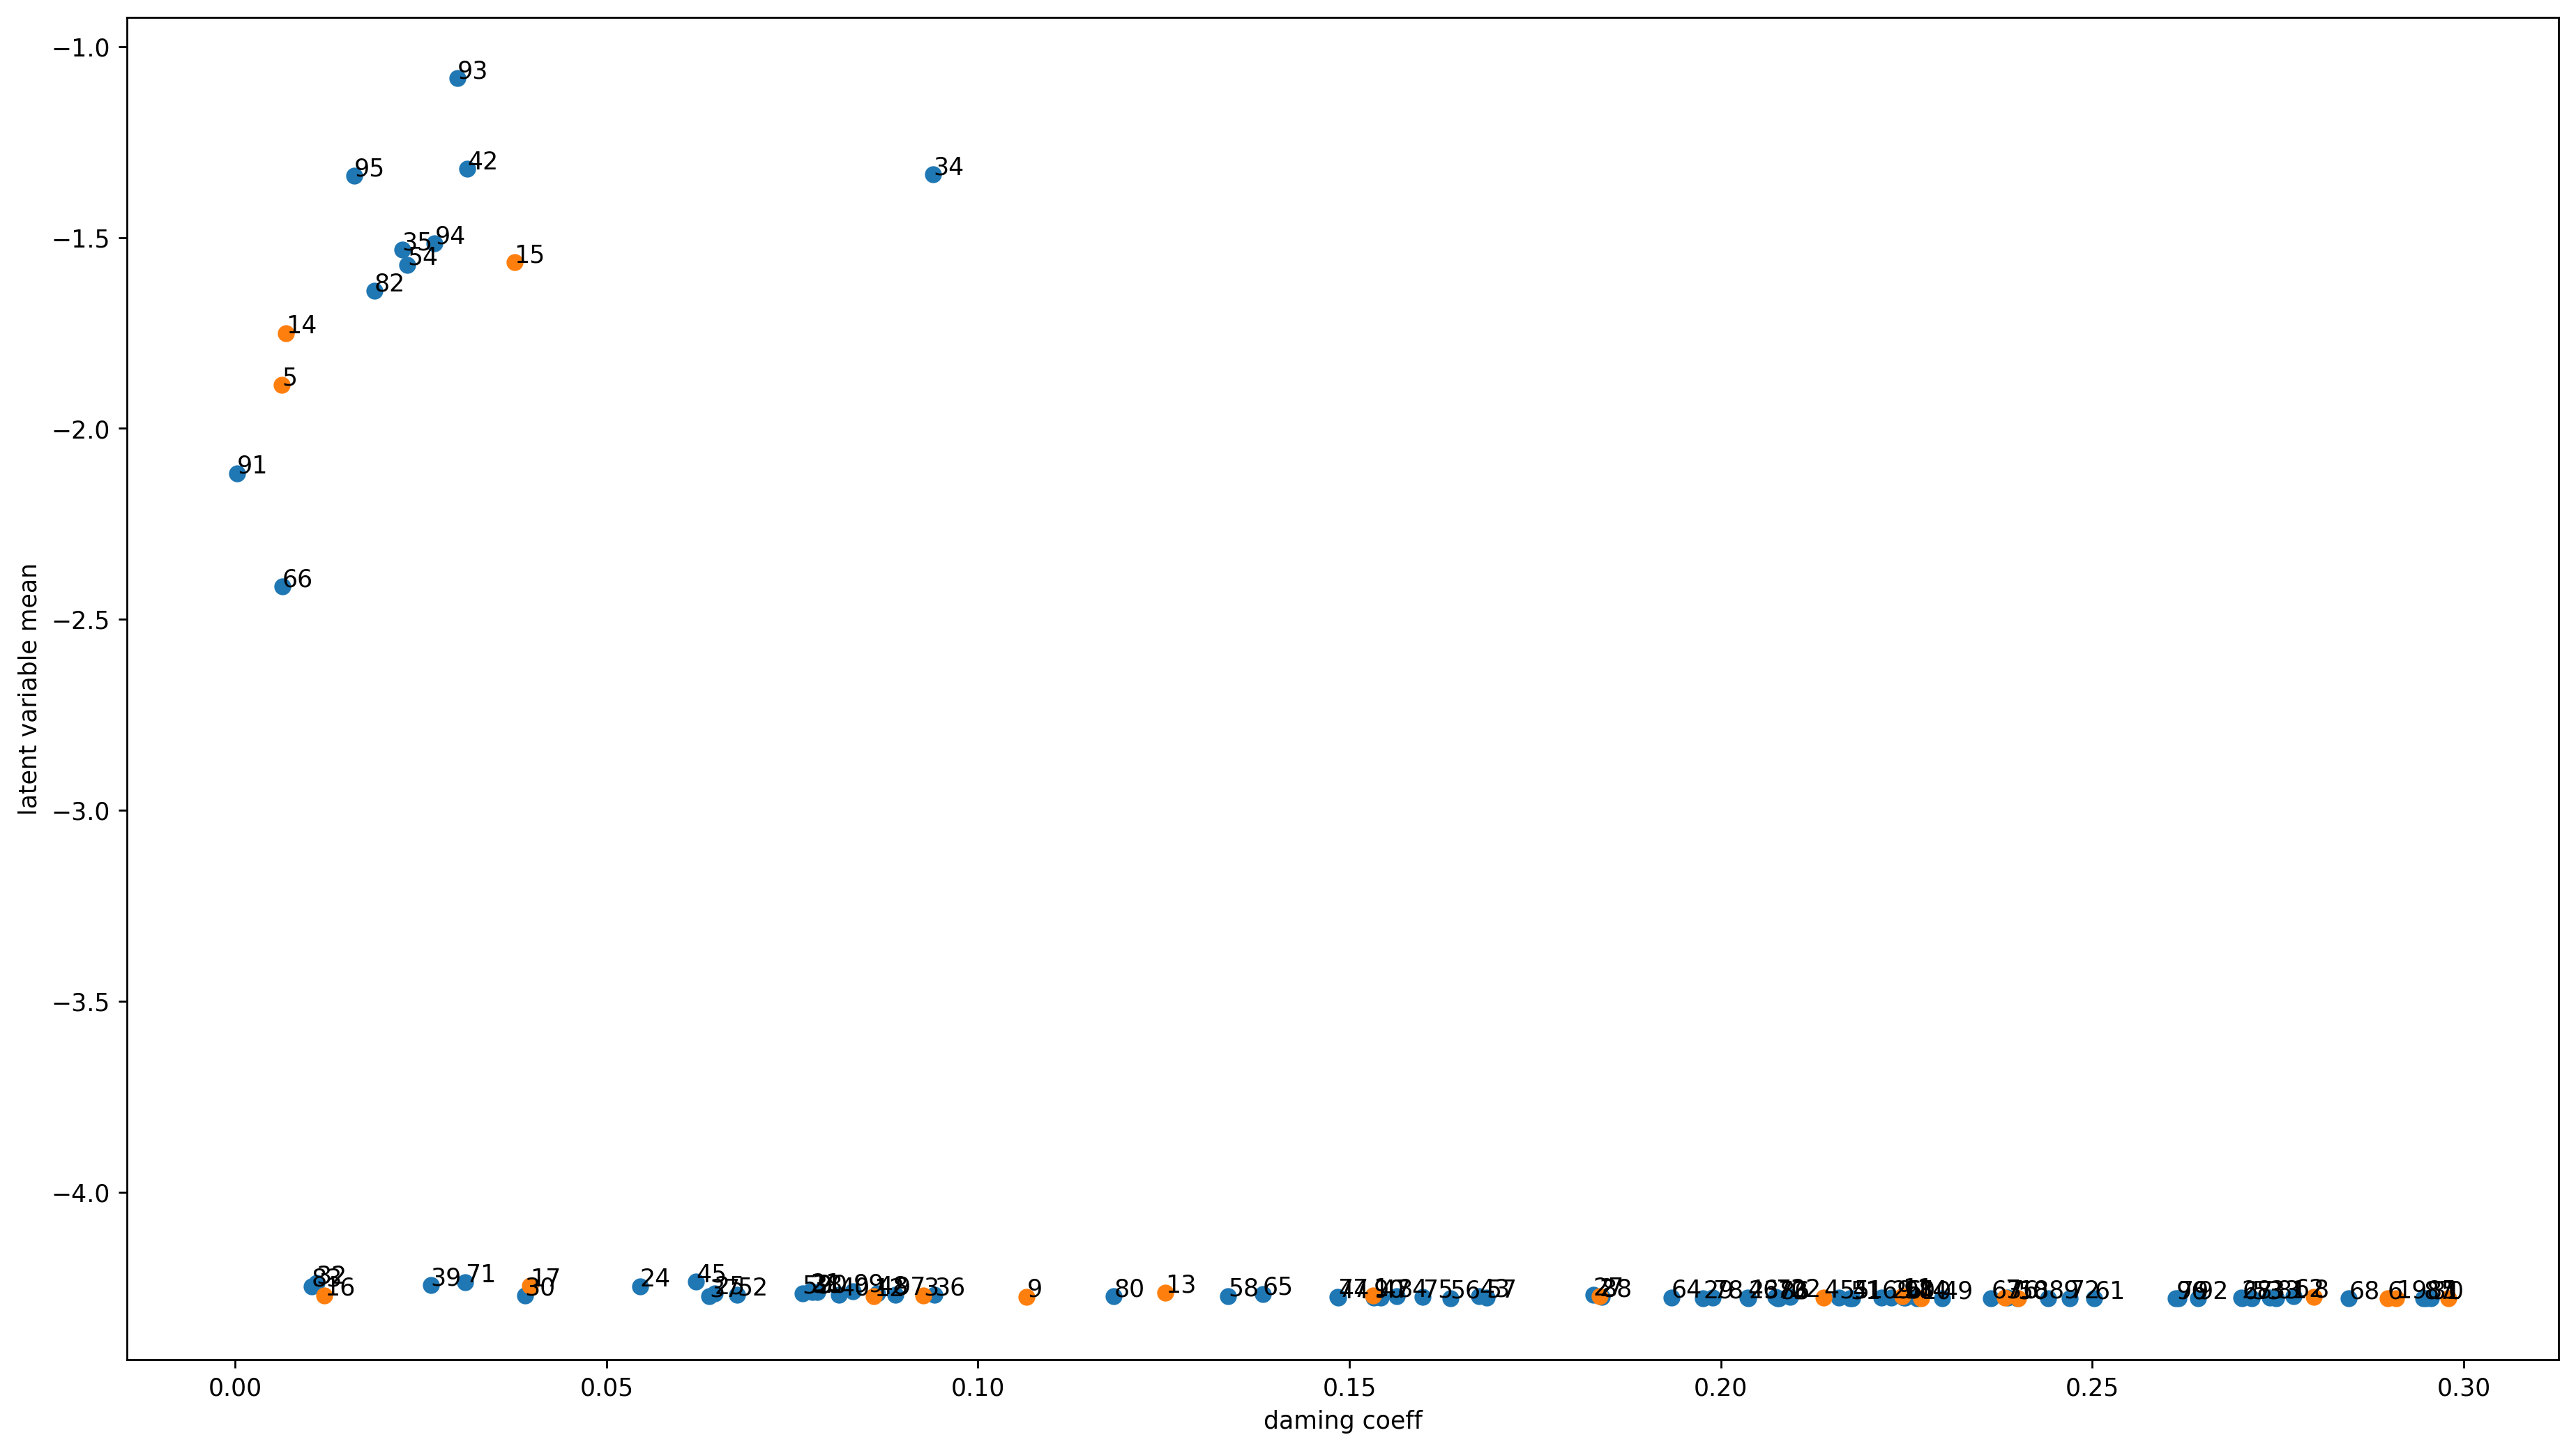

[0.29791016 0.15322083 0.18365987 0.09261918 0.21384459 0.00627838
 0.28977922 0.23826577 0.27982297 0.10656002]
[0.22693388 0.2244697  0.08596681 0.12522523 0.00685178 0.03757813
 0.01196297 0.03966669 0.24002473 0.29092061]
[0.07835583 0.07746172 0.20934208 0.20371297 0.05450337 0.06451795
 0.2229776  0.1828022  0.27007945 0.19762321]
[0.03898917 0.29555121 0.01093391 0.27386888 0.09397505 0.02248499
 0.09414549 0.06385285 0.07767223 0.02632497]
[0.08125716 0.21770374 0.03126921 0.1674378  0.14847363 0.06205282
 0.20363688 0.15417275 0.08645989 0.22978046]
[0.23991758 0.21743357 0.06757306 0.2714981  0.02319353 0.21589278
 0.16356097 0.16844176 0.13367955 0.07634676]
[0.22476822 0.25029279 0.2771417  0.23638723 0.19333075 0.13834196
 0.00632632 0.27019082 0.28455401 0.22163373]
[0.20737241 0.03096922 0.24692379 0.20760993 0.22644138 0.1598574
 0.23863549 0.1484238  0.19891706 0.26157098]
[0.11830818 0.27478066 0.01872246 0.01027625 0.15642099 0.29498274
 0.20786144 0.29459763 0.18393

In [5]:
plt.figure(figsize=(18,10), dpi=250)
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()
plt.xlabel("daming coeff")
plt.ylabel("latent variable mean")

plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.xlim([-0.05,0.35])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter0.png")
plt.savefig(figfilenamehead+"damping_latent_iter0.eps")
plt.savefig(figfilenamehead+"damping_latent_iter0.pdf")
plt.show()

# plt.figure(figsize=(16,12))
# plt.xlim([0.06,0.14])
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [6]:
iwvi.get_real_rollout_mdppolicy_data()

0  c = 0.16346495489906906


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

1  c = 0.175923049855898
2  c = 0.213101048692264
3  c = 0.14501806056071762
4  c = 0.004052611988015664
5  c = 0.120134560420777
6  c = 0.25697024030079035
7  c = 0.09642657758269942
8  c = 0.05526129195564814
9  c = 0.11417486037608537
10  c = 0.25864988011260814
11  c = 0.020876132555705383
12  c = 0.2613891486606151
13  c = 0.10624180953664825
14  c = 0.03203027777652895
15  c = 0.1622476552961531
16  c = 0.1618277342655034
17  c = 0.055320312028603325
18  c = 0.09391364165595244
19  c = 0.11885913261799258
20  c = 0.11403897859981632
21  c = 0.09912067121474619
22  c = 0.06488189030041151
23  c = 0.03506631058301788
24  c = 0.19965083813641546
25  c = 0.08571604451747712
26  c = 0.1514796791677473
27  c = 0.04546713757372708
28  c = 0.13733918450179566
29  c = 0.1522597624567635
30  c = 0.02389789952996266
31  c = 0.0638122346167221
32  c = 0.28146488121321594
33  c = 0.2259386184773079
34  c = 0.28977259206899
35  c = 0.15402135084365112
36  c = 0.14479756250669107
37  c = 0.0134

In [7]:
# fig = plt.figure(figsize=(18,10))
# ax_list = []
# for i in range(50):
#     ax_list.append(fig.add_subplot(5, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1]) 
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1]) 
# print("オフラインデータvs実環境方策rollout")

0  c = 0.20021770810986864
1  c = 0.1983582812192558
2  c = 0.022555950291700478
3  c = 0.20541677419620874
4  c = 0.10100278390403257
5  c = 0.18626578567738697
6  c = 0.05051976271514567
7  c = 0.047219332290270255
8  c = 0.1703964189334006
9  c = 0.14840815680292022
10  c = 0.24494872822400177
11  c = 0.025342155733352467
12  c = 0.29120495159551035
13  c = 0.1062823595846313
14  c = 0.2005682341251094
15  c = 0.2575002131665844
16  c = 0.2478069086585581
17  c = 0.10556652164894924
18  c = 0.1263102409001565
19  c = 0.06421935796424785
20  c = 0.162199131307732
21  c = 0.2946662208960819
22  c = 0.07020726813281049
23  c = 0.15752760672287627
24  c = 0.08439030047625135
25  c = 0.07330712053657978
26  c = 0.1016651025954488
27  c = 0.006908891882512702
28  c = 0.1901597193331265
29  c = 0.1863173542495256
30  c = 0.15759887301895484
31  c = 0.0308689768266279
32  c = 0.24135050248338633
33  c = 0.2181328493603175
34  c = 0.10463073088503207
35  c = 0.04975650100345974
36  c = 0.179

93  c = 0.24488695696379334
94  c = 0.2531630725144382
95  c = 0.2501007404391354
predict diverge [ 10.74036884 774.70859349]
96  c = 0.03765543221993569
97  c = 0.1447889054074812
98  c = 0.03610528656962901
99  c = 0.2376621125429203
 
実環境方策rollout vs Sim環境方策rollout


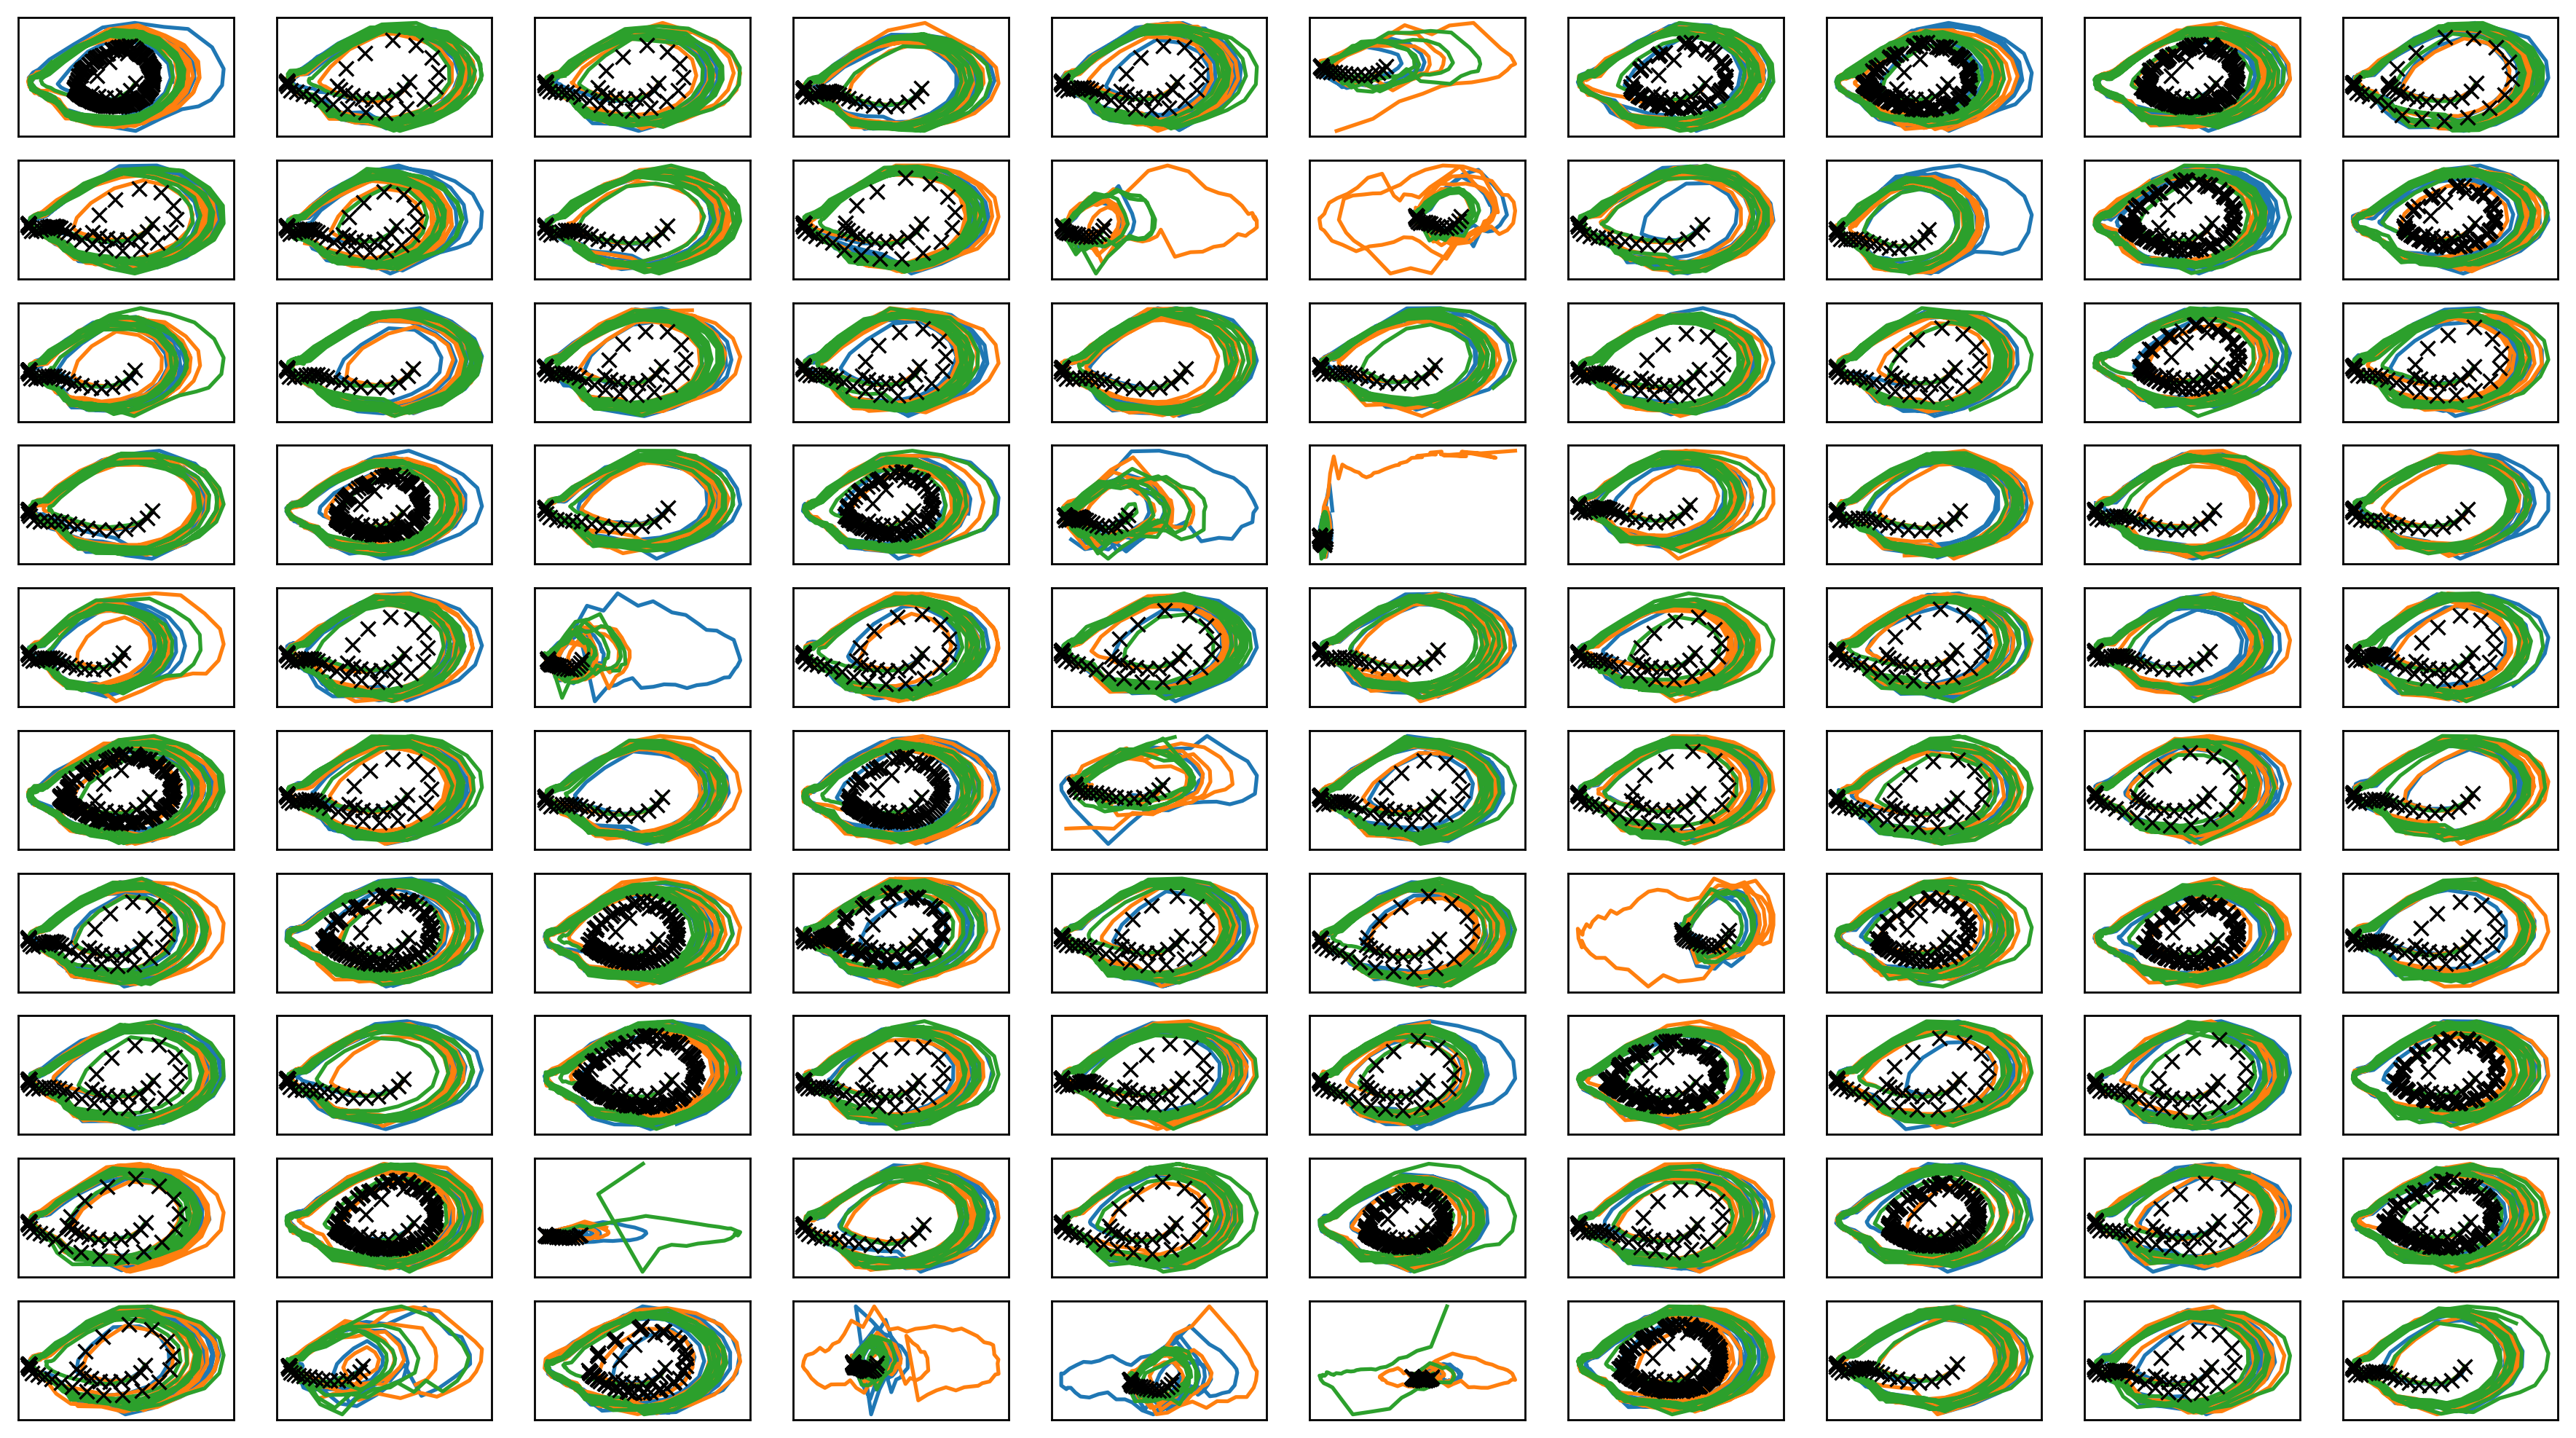

In [8]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0d = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0e = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter0.png")
plt.savefig(figfilenamehead+"joint_iter0.eps")
plt.savefig(figfilenamehead+"joint_iter0.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [9]:
print(datetime.datetime.now())

2023-04-15 09:03:39.743351


# Iter 1

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

0  c = 0.21173578446774205
c = 0.29613616116266267
c = 0.14261381247187307
c = 0.03134266417929309
c = 0.18768298619818488
c = 0.22746078515527657
c = 0.008477972314120097
1  c = 0.13479512447911798
c = 0.06128484916266449
c = 0.05153926393648715
c = 0.014095977336605158
c = 0.18640047639474708
c = 0.06696579973468546
c = 0.07418226119295034
c = 0.09801626505407315
c = 0.18738733329715648
2  c = 0.27552350639993944
c = 0.08638976355194454
c = 0.28650721828062853
c = 0.16757616581017884
c = 0.036303648522769905
c = 0.01886908811769725
c = 0.054504068698648656
c = 0.048511950143705636
c = 0.20357742157999598
c = 0.10243203801547246
c = 0.2009294802726103
c = 0.03233228597029623
3  c = 0.21626150878014552
c = 0.29526741876491275
c = 0.06555089226877321
c = 0.032139462474833076
c = 0.014239526318916906
c = 0.030234364519274526
c = 0.06154806697686888
4  c = 0.13527723677806278
c = 0.17707470996570454
c = 0.16786738404595006
c = 0.2476335009210234
c = 0.04045709864191702
c = 0.2238645530952

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)


In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:

def f(x):
#     return x
    return np.log10(x)

fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()), vmin=f(min_val), vmax=f(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter1.png")

In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
# #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
# #     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# for i in range(100):
#     print(i, " ", end="")
#     fig = plt.figure(figsize=(16,10), dpi=150)
#     fig.patch.set_facecolor('white')
#     plt.plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     plt.plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     plt.scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()),
#                vmin=-8, vmax=3
#                )
#     plt.colorbar()
#     plt.savefig("ratio"+str(i)+".png")
#     plt.close()

In [ ]:

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=1)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
print("alpha",alpha, "vae_lr", vae_lr)
# plt.ylim([-2000, 1000])

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0d = copy.deepcopy(iwvi.simenv_rolloutdata)
# iwvi.get_sim_rollout_data_fixlen()
# simdata0e = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter1.png")
plt.savefig(figfilenamehead+"joint_iter1.eps")
plt.savefig(figfilenamehead+"joint_iter1.pdf")
print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
plt.xlim([0,0.3])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter1.png")
plt.savefig(figfilenamehead+"damping_latent_iter1.eps")
plt.savefig(figfilenamehead+"damping_latent_iter1.pdf")
plt.show()

# plt.figure(figsize=(16,12))
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.xlim([0.06,0.14])
# plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter2

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)


In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:
fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()), vmin=f(min_val), vmax=f(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter2.png")

In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
# #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
# #     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=1)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()


print("alpha",alpha, "vae_lr", vae_lr)
# plt.ylim([-2000, 1000])

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter2.png")
plt.savefig(figfilenamehead+"joint_iter2.eps")
plt.savefig(figfilenamehead+"joint_iter2.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
plt.xlim([0,0.3])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter2.png")
plt.savefig(figfilenamehead+"damping_latent_iter2.eps")
plt.savefig(figfilenamehead+"damping_latent_iter2.pdf")
plt.show()

# plt.figure(figsize=(16,12))
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.xlim([0.06,0.14])
# plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter 3

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)



In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:
fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()), vmin=f(min_val), vmax=f(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter3.png")

In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
# #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
# #     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# i = 49
# plt.plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1])
# plt.plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
# # plt.plot(simdata1b[i][:,0], simdata1b[i][:,1]) 
# plt.scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()),
#            # vmin=f(min_val), vmax=f(max_val)
#            )
# plt.colorbar()

In [ ]:

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=1)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()

print("alpha",alpha, "vae_lr", vae_lr)
# plt.ylim([-2000, 1000])

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter3.png")
plt.savefig(figfilenamehead+"joint_iter3.eps")
plt.savefig(figfilenamehead+"joint_iter3.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
plt.xlim([0,0.3])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter3.png")
plt.savefig(figfilenamehead+"damping_latent_iter3.eps")
plt.savefig(figfilenamehead+"damping_latent_iter3.pdf")
plt.show()

# plt.figure(figsize=(16,12))
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.xlim([0.06,0.14])
# plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter 4

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)


In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:
fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()), vmin=f(min_val), vmax=f(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter4.png")

In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
# #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
# #     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# i = 35
# plt.plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1])
# plt.plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
# # plt.plot(simdata1b[i][:,0], simdata1b[i][:,1]) 
# plt.scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()),
#            # vmin=f(min_val), vmax=f(max_val)
#            )
# plt.colorbar()

In [ ]:

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=1)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()

print("alpha",alpha, "vae_lr", vae_lr)
# plt.ylim([-2000, 1000])

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter4.png")
plt.savefig(figfilenamehead+"joint_iter4.eps")
plt.savefig(figfilenamehead+"joint_iter4.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
plt.xlim([0,0.3])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter4.png")
plt.savefig(figfilenamehead+"damping_latent_iter4.eps")
plt.savefig(figfilenamehead+"damping_latent_iter4.pdf")
plt.show()

# plt.figure(figsize=(16,12))
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.xlim([0.06,0.14])

# plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# Iter5

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)

In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:
fig = plt.figure(figsize=(18,10), dpi=250)
ax_list = []
# min_val = min([iwvi.offlinedata_weight[i].min().numpy() for i in range(len(offline_data))])
# max_val = max([iwvi.offlinedata_weight[i].max().numpy() for i in range(len(offline_data))])
min_val = 1e-8
max_val = 1e3
print(min_val, max_val)

for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
    ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()), vmin=f(min_val), vmax=f(max_val), s=5) 
plt.savefig(figfilenamehead+"weight_iter5.png")

In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
# #     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:
# fig = plt.figure(figsize=(18,10))
# print(min_val, max_val)
# for i in range(len(offline_data)):
#     ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
#     ax_list[-1].set_xticks([])
#     ax_list[-1].set_yticks([])
# #     ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"k-")
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"rx")
#     ax_list[-1].scatter(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1], c=f(iwvi.offlinedata_weight[i].numpy()/iwvi.offlinedata_weight[i].numpy().sum()), vmin=f(min_val), vmax=f(max_val), s=5) 


In [ ]:

train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=1)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()
train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=2)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()


train_curve, valid_curve = iwvi.train_weighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, weight_alpha=alpha, flag=3)
iwvi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.show()

print("alpha",alpha, "vae_lr", vae_lr)
# plt.ylim([-2000, 1000])

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0a = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0b = copy.deepcopy(iwvi.simenv_rolloutdata)
iwvi.get_sim_rollout_mdppolicy_data_fixlen()
simdata0c = copy.deepcopy(iwvi.simenv_rolloutdata)

fig = plt.figure(figsize=(18,10), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
#     ax_list[-1].plot(iwvi.offline_data[i][:,0], iwvi.offline_data[i][:,1],"kx") 
#     ax_list[-1].plot(iwvi.simenv_rolloutdata[i][:,0], iwvi.simenv_rolloutdata[i][:,1],"o") 
    ax_list[-1].plot(simdata0a[i][:,0], simdata0a[i][:,1]) 
    ax_list[-1].plot(simdata0b[i][:,0], simdata0b[i][:,1]) 
    ax_list[-1].plot(simdata0c[i][:,0], simdata0c[i][:,1]) 
#     ax_list[-1].plot(simdata0d[i][:,0], simdata0d[i][:,1]) 
#     ax_list[-1].plot(simdata0e[i][:,0], simdata0e[i][:,1]) 

    ax_list[-1].plot(iwvi.debug_realenv_rolloutdata[i][:,0], iwvi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"joint_iter5.png")
plt.savefig(figfilenamehead+"joint_iter5.eps")
plt.savefig(figfilenamehead+"joint_iter5.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

In [ ]:
plt.figure(figsize=(16,12))
np_mulogvar = iwvi.mulogvar_offlinedata.numpy()


plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
plt.xlim([0,0.3])
for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.savefig(figfilenamehead+"damping_latent_iter5.png")
plt.savefig(figfilenamehead+"damping_latent_iter5.eps")
plt.savefig(figfilenamehead+"damping_latent_iter5.pdf")

plt.show()

# plt.figure(figsize=(16,12))
# plt.plot(debug_info[iwvi.validdata_num:,1], np_mulogvar[iwvi.validdata_num:,0], "o")
# plt.plot(debug_info[:iwvi.validdata_num,1], np_mulogvar[:iwvi.validdata_num,0], "o")
# plt.plot([bif_c, bif_c],[np_mulogvar[:,0].min(),np_mulogvar[:,0].max()])
# for i in range(len(debug_info)):
#     plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
# plt.xlim([0.06,0.14])
# plt.show()


for i in range(10):
    print(debug_info[i*10 : (i+1)*10,1])
# plt.show()
print("摩擦係数-潜在変数")

In [ ]:
print(datetime.datetime.now())

# 評価関数計算

In [ ]:
iwvi.get_sim_rollout_mdppolicy_data_randomstop()

In [ ]:
iwvi.train_ratio(num_iter=num_iter_max, lr=ratio_lr, early_stop_step=ratio_early, policy=agent.select_action)
iwvi.save()
# plt.plot(train_curve)
# plt.plot(valid_curve)

In [ ]:
loss_list.append(iwvi.eval_loss(weight_alpha=1.))
normalized_loss_list.append(iwvi.eval_loss(weight_alpha=alpha))


In [ ]:
train_curve, valid_curve = iwvi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


In [ ]:
print(iwvi.initial_belief)


In [ ]:
train_curve, valid_curve = iwvi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

In [ ]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [ ]:
iwvi.save()

In [ ]:
loss_array = np.array(loss_list)

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(loss_array[:,0])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve.png")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve.eps")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve.pdf")

In [ ]:
normalized_loss_array = np.array(normalized_loss_list)
plt.figure(figsize=(16,12))
plt.plot(normalized_loss_array[:,0])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve_normalized_"+env_str+".png")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve_normalized_"+env_str+".eps")
plt.savefig(figfilenamehead+"policy_evaluartion_learning_curve_normalized_"+env_str+".pdf")